LEVEL - 1

TASK -1


In [3]:
import pandas as pd
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Dataset .csv")

# Count top cuisines
top_cuisines = df['Cuisines'].value_counts().head(3)

# Calculate percentages
total_restaurants = len(df)
cuisine_percentages = (top_cuisines / total_restaurants) * 100

print("Top Cuisines:\n", top_cuisines)
print("Cuisine Percentages:\n", cuisine_percentages)
top_cuisines = df['Cuisines'].value_counts().head(3)

# Calculate percentages
total_restaurants = len(df)
cuisine_percentages = (top_cuisines / total_restaurants) * 100

print("Top Cuisines:\n", top_cuisines)
print("Cuisine Percentages:\n", cuisine_percentages)


Top Cuisines:
 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64
Cuisine Percentages:
 Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64
Top Cuisines:
 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64
Cuisine Percentages:
 Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


TASK -2

In [4]:
# Identify city with the highest number of restaurants
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()

# Calculate average ratings per city
city_avg_rating = df.groupby('City')['Aggregate rating'].mean()

# Identify city with highest average rating
top_avg_rating_city = city_avg_rating.idxmax()

print(f"City with most restaurants: {top_city}")
print(f"City with highest average rating: {top_avg_rating_city}")


City with most restaurants: New Delhi
City with highest average rating: Inner City


TASK -3

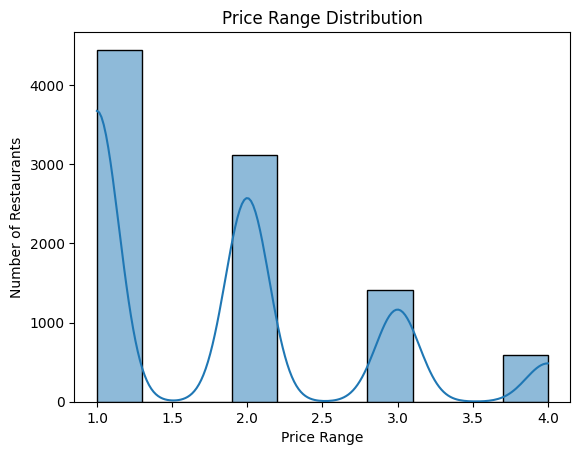

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot price range distribution
sns.histplot(df['Price range'], bins=10, kde=True)
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Price Range Distribution")
plt.show()

# Calculate percentage of restaurants in each price range
price_range_counts = df['Price range'].value_counts(normalize=True) * 100
print(price_range_counts)


TASK - 4

In [6]:
# Percentage of restaurants with online delivery
online_delivery_pct = df['Has Online delivery'].value_counts(normalize=True) * 100

# Compare ratings
avg_ratings_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()

print("Online Delivery Percentage:\n", online_delivery_pct)
print("Average Ratings Comparison:\n", avg_ratings_delivery)


Online Delivery Percentage:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64
Average Ratings Comparison:
 Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


**LEVEL 2**

TASK -1

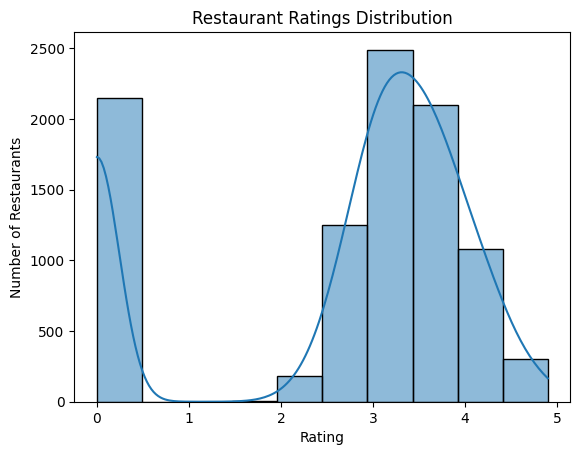

In [7]:
# Analyzing rating distribution
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.title("Restaurant Ratings Distribution")
plt.show()


TASK - 2

In [8]:
from itertools import combinations
from collections import Counter

# Split cuisine combinations
cuisine_combinations = df['Cuisines'].dropna().str.split(', ')

# Count most common pairs
pair_counts = Counter([tuple(sorted(pair)) for cuisines in cuisine_combinations for pair in combinations(cuisines, 2)])
top_combinations = pair_counts.most_common(5)

print("Top Cuisine Combinations:", top_combinations)


Top Cuisine Combinations: [(('Chinese', 'North Indian'), 1784), (('Mughlai', 'North Indian'), 832), (('Fast Food', 'North Indian'), 485), (('Continental', 'North Indian'), 468), (('Chinese', 'Fast Food'), 466)]


TASK - 3

In [9]:
import folium

# Create map centered at an average location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Add restaurants to the map
for _, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)

m.save("restaurant_map.html")
print("Map saved as restaurant_map.html")


Map saved as restaurant_map.html


TASK -4

In [10]:
# Identify restaurant chains
chain_counts = df['Restaurant Name'].value_counts()
popular_chains = chain_counts[chain_counts > 5]  # Chains with more than 5 restaurants

# Analyze ratings for chains
chain_avg_rating = df[df['Restaurant Name'].isin(popular_chains.index)].groupby('Restaurant Name')['Aggregate rating'].mean()

print("Popular Restaurant Chains:\n", popular_chains)
print("Chain Average Ratings:\n", chain_avg_rating)


Popular Restaurant Chains:
 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
Wrapss               6
TGI Friday's         6
Mainland China       6
Punjabi Rasoi        6
Southy               6
Name: count, Length: 84, dtype: int64
Chain Average Ratings:
 Restaurant Name
34, Chowringhee Lane    2.791667
Aggarwal Sweets         0.792857
Al Bake                 2.950000
Angels in my Kitchen    3.412500
Apni Rasoi              1.941667
                          ...   
Twenty Four Seven       2.147368
Wah Ji Wah              2.342105
Wow! Momo               2.754545
Wrapss                  2.566667
Yo! China               2.988889
Name: Aggregate rating, Length: 84, dtype: float64
